In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
alldf = pd.read_excel('/Users/la/Documents/GitHub/MNCH_Data_Analysis/MNCH-Data/MAGARINI MNCH Cleaned data.xlsx', sheet_name="MNCH EValuation Data")
preg = pd.read_excel('/Users/la/Documents/GitHub/MNCH_Data_Analysis/MNCH-Data/MAGARINI MNCH Cleaned data.xlsx', sheet_name="MNCH Pregnant Women")
child = pd.read_excel('/Users/la/Documents/GitHub/MNCH_Data_Analysis/MNCH-Data/MAGARINI MNCH Cleaned data.xlsx', sheet_name="MNCH 0-24 Months")
# Before reading our dataset, we would like to ensure all columns are visible 
# ---
#  
pd.set_option("display.max.columns", None)

In [3]:
alldf.head(2)

,start,end,i. Date,ii. Enumerator's name,iii. Beneficiary's resident Sub Location,iv. Beneficiary's resident Village,v. Household size: How many people are in your household?,"vi. Of the above, how many children are;",vi. (a).2-5 years ?,vi. (b). 7 - 24 Months?,vi. (c). 0 - 6 Months?,vii. Category of the Beneficiary,SECTION 1: QUESTIONNAIRE FOR CHILDREN 0 -24 MONTHS,"SECTION 1.A. : SOCIO-DEMOGRAPHICS FOR BREASTFEEDING MOTHER, CAREGIVERS OF CHILDREN 0-24 MONTHS (BELOW 2YEARS OF AGE",A. How old are you?,B. Highest level of school you attended?,C. How old is your youngest child?,"Baby's Gender(1=Boy, 2= Girl).",SECTION 1.B: MATERNAL AND NEW-BORN CARE.,1. Did you seek antenatal care while carrying your most recent pregnancy?,"2. If Yes, please tell where you sort services from",3. At what Gestation were you when you went for your 1st ANC visit?,4. How many ANC Visits did you attend during this pregnancy?,"5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Nutrition during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Rest during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Self-care during pregnancy","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Birth preparedness","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Family planning","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs during delivery","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Post-partum danger signs for the mother","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Danger signs for the new-born","5. During the time you went for antenatal care visits when pregnant for the last, were you counseled on any of the following?/Breastfeeding","6. During your last antenatal care visit, before delivering this baby , did someone;","6. During your last antenatal care visit, before delivering this baby , did someone;/Check your blood pressure","6. During your last antenatal care visit, before delivering this baby , did someone;/Perform an abdominal examination","6. During your last antenatal care visit, before delivering this baby , did someone;/Listen to the baby’s heartbeat","6. During your last antenatal care visit, before delivering this baby , did someone;/Ask about your medical history","6. During your last antenatal care visit, before delivering this baby , did someone;/Take a urine sample","6. During your last antenatal care visit, before delivering this baby , did someone;/Give you advice on what to do if you have a problem","6. During your last antenatal care visit, before delivering this baby , did someone;/Give an injection(s) for tetanus","6. During your last antenatal care visit, before delivering this baby , did someone;/Give you malaria medicine","6. During your last antenatal care visit, before delivering this baby , did someone;/Ask you to take / conduct a syphilis test","6. During your last antenatal care visit, before delivering this baby , did someone;/Ask you to take / conduct an HIV test",7. What were the reasons that you did not see someone for antenatal care?,7. What were the reasons that you did not see someone for ant

Population Size

In [4]:
alldf['v. Household size: How many people are in your household?'].count()

162

Age of the people in the Household 

In [10]:
alldf['A. How old are you?'].value_counts()

18–29         74
30–49         58
Below 18       2
50 & above     2
Name: A. How old are you?, dtype: int64

Text(0, 0.5, 'Sample Size')

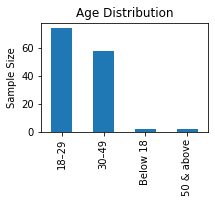

In [12]:
import matplotlib.ticker as mtick

ax = alldf['A. How old are you?'].value_counts(sort=True).plot(kind='bar', figsize=(3, 2), title = "Age Distribution")
plt.ylabel('Sample Size')

/Users/la/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A. How old are you?', ylabel='count'>

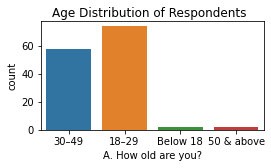

In [30]:
fig,axes = plt.subplots(figsize=(4,2))
fig.suptitle('Age Distribution of Respondents')
sns.countplot('A. How old are you?', data = alldf)

Education Level

/Users/la/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='B. Highest level of school you attended?', ylabel='count'>

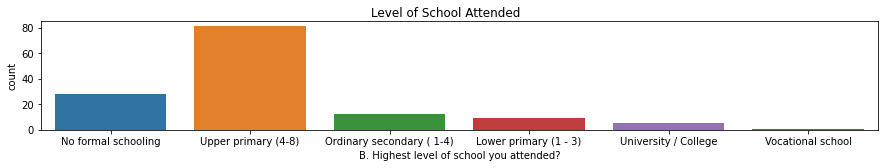

In [35]:
fig,axes = plt.subplots(figsize=(15,2))
fig.suptitle('Level of School Attended')
sns.countplot('B. Highest level of school you attended?', data = alldf)

In [36]:
alldf['B. Highest level of school you attended?'].value_counts(sort=True)


Upper primary (4-8)          81
No formal schooling          28
Ordinary secondary ( 1-4)    12
Lower primary (1 - 3)         9
University / College          5
Vocational school             1
Name: B. Highest level of school you attended?, dtype: int64

Number of people in the household

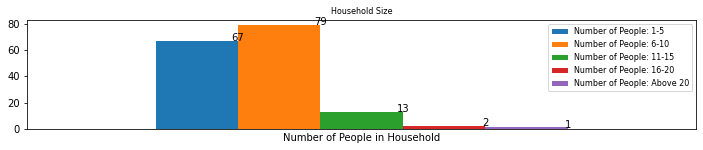

In [41]:
age_1_5 = alldf[(alldf['v. Household size: How many people are in your household?'] >= 1 )& (alldf['v. Household size: How many people are in your household?'] <= 5)]
age_6_10 = alldf[(alldf['v. Household size: How many people are in your household?'] >= 6) & (alldf['v. Household size: How many people are in your household?'] <= 10)]
age_11_15 = alldf[(alldf['v. Household size: How many people are in your household?'] >= 11) & (alldf['v. Household size: How many people are in your household?'] <= 16)]
age_16_20 = alldf[(alldf['v. Household size: How many people are in your household?'] >= 16) & (alldf['v. Household size: How many people are in your household?'] <= 20)]
age_21_25 = alldf[(alldf['v. Household size: How many people are in your household?'] > 20)]

df_dict = pd.DataFrame({'Number of People: 1-5': [age_1_5['v. Household size: How many people are in your household?'].count()],
 'Number of People: 6-10': [age_6_10['v. Household size: How many people are in your household?'].count()], 
 'Number of People: 11-15': [age_11_15['v. Household size: How many people are in your household?'].count()],
  'Number of People: 16-20': [age_16_20['v. Household size: How many people are in your household?'].count()], 
  'Number of People: Above 20': [age_21_25['v. Household size: How many people are in your household?'].count()]}, index=[0])

df_dict.head()
# colors_list = ['#5cb85c','#5bc0de','#d9534f','#40E0D0','#008000']

# Normalize result
# result_pct = df_dict.div(df_dict.sum(1), axis=0)

ax = df_dict.plot(kind='bar',figsize=(12,2),width = 0.8,edgecolor=None)
ax.set_xlabel("Number of People in Household")
plt.legend(labels=df_dict.columns,fontsize= 8)
plt.title("Household Size",fontsize= 8)

plt.xticks(fontsize=14, weight = "bold")
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.xticks([])

# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/1.00, y + height*1.00), ha='center')


In [42]:
df_dict.head()

,Number of People: 1-5,Number of People: 6-10,Number of People: 11-15,Number of People: 16-20,Number of People: Above 20
0,67,79,13,2,1
